In [2]:
%pip install numpy scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 360.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 7.2 MB/s eta 0:00:0000:01m00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import scipy.interpolate as interp
import scipy.signal as signal
import csv
import matplotlib.pyplot as plt

In [11]:
def read_csv(csv_path ):
    np_path_XYs = np.genfromtxt(csv_path , delimiter=",")
    path_XYs = []
    for i in np.unique(np_path_XYs [:, 0]):
        npXYs = np_path_XYs[np_path_XYs [:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

In [12]:
def plot(paths_XYs, colours=None):
    if colours is None:
        # Default color palette
        colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    fig, ax = plt.subplots(tight_layout=True, figsize=(4, 4))
    
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    
    ax.set_aspect("equal")
    plt.show()

In [18]:
def smooth_and_generalize(paths_XYs, smoothing_factor=0.1):
    smoothed_paths = []

    for XYs in paths_XYs:
        smoothed_segments = []
        for XY in XYs:
            # If the segment has less than 3 points, it can't be smoothed or generalized
            if len(XY) < 3:
                smoothed_segments.append(XY)
                continue

            # Fit a spline to smooth the curve
            tck, u = interp.splprep([XY[:, 0], XY[:, 1]], s=smoothing_factor)
            smooth_X, smooth_Y = interp.splev(u, tck)

            # For lines, we might want to approximate to a straight line
            
            
            if np.std(smooth_X) < 0.1 or np.std(smooth_Y) < 0.001:  # Arbitrary threshold to detect near-straight lines
                # Fit a straight line (linear regression)
                coef = np.polyfit(XY[:, 0], XY[:, 1], 1)
                straight_line = np.polyval(coef, XY[:, 0])
                smooth_X = XY[:, 0]
                smooth_Y = straight_line

            smoothed_segments.append(np.column_stack((smooth_X, smooth_Y)))

        smoothed_paths.append(smoothed_segments)

    return smoothed_paths

In [19]:
def write_csv(paths_XYs, output_path):
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        for path_id, XYs in enumerate(paths_XYs, start=1):
            for segment_id, XY in enumerate(XYs, start=1):
                for point in XY:
                    writer.writerow([path_id, segment_id, point[0], point[1]])

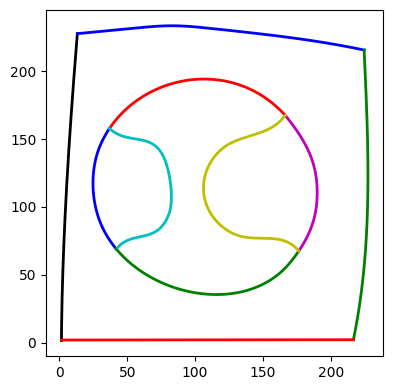

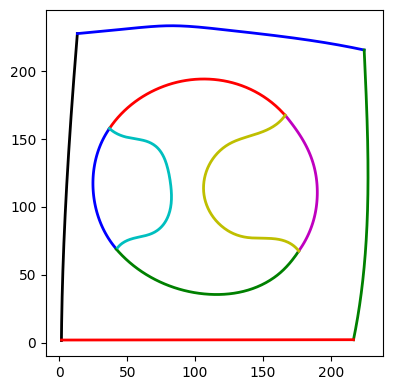

In [21]:
# Assuming you've already defined read_csv and plot functions

# Read the input CSV
input_path = './assets/input.csv'  # Replace with your input file path
paths_XYs = read_csv(input_path)

# Plot the original paths
plot(paths_XYs)

# Smooth and generalize the shapes
smoothed_paths = smooth_and_generalize(paths_XYs)

# Plot the smoothed and generalized paths
plot(smoothed_paths)

# Write the output to a new CSV
output_path = 'output.csv'  # Replace with your desired output file path
write_csv(smoothed_paths, output_path)